<a href="https://colab.research.google.com/github/oyeankit/My-Assignment/blob/main/Adhish_assignment_fraud_vs_non_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataframe = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [2]:
dataframe

NameError: name 'dataframe' is not defined

# Data Cleaning process

In [ ]:
print(dataframe.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


# Missing Values

In [3]:
print(dataframe.info())

NameError: name 'dataframe' is not defined

# Handle the missing values

In [ ]:
dataframe = dataframe.dropna()
dataframe

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Check the eliminated columns
print("Available columns:", dataframe.columns.tolist())

Available columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


# Distribution

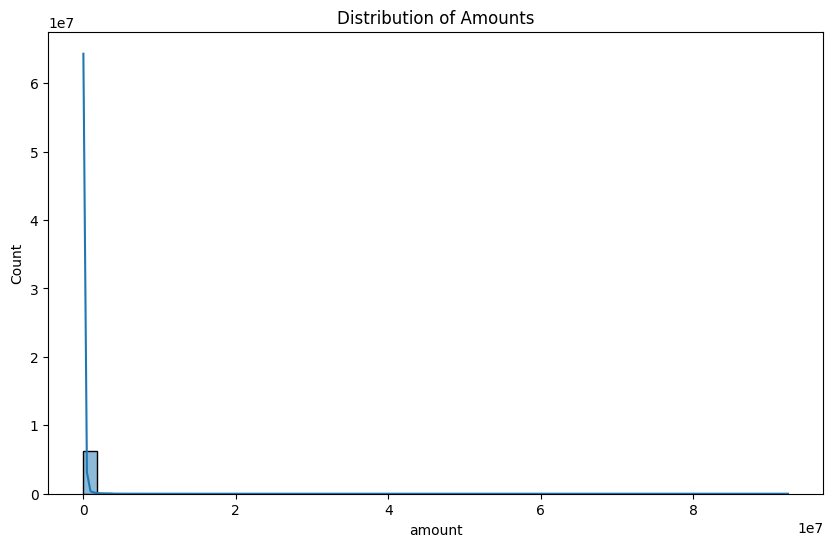

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Amounts
plt.figure(figsize=(10, 6))
sns.histplot(dataframe['amount'], bins=50, kde=True)
plt.title('Distribution of Amounts')
plt.show()

# Adjustments on the layout and display
plt.tight_layout()
plt.show()

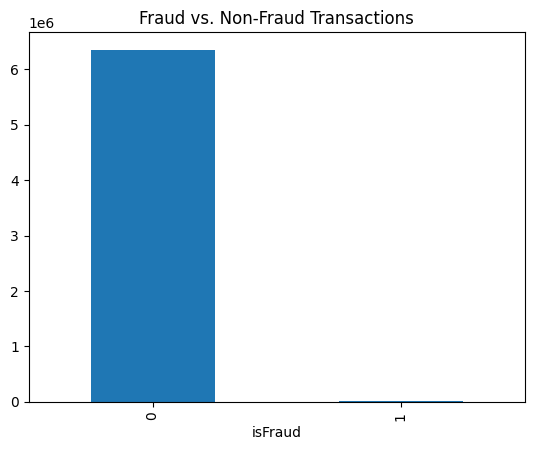

In [ ]:
fraud_counts = dataframe['isFraud'].value_counts()
fraud_counts.plot(kind='bar')
plt.title('Fraud vs. Non-Fraud Transactions')
plt.show()

# Evaluation

Available columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

Data types of columns:
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
dtype: object

Categorical columns to be encoded: ['type', 'nameOrig', 'nameDest']


<Figure size 800x600 with 0 Axes>

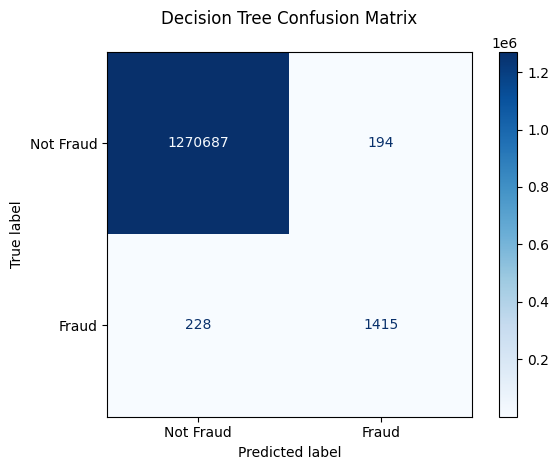


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.88      0.86      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.94      0.93      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# features (X) and target (y)
# We have column is 'frau d' or similar
target_column = 'isFraud'

# Print available columns to help identify the correct target column
print("Available columns:", dataframe.columns.tolist())

# Prepare X and y
X = dataframe.drop(target_column, axis=1)  # All columns except target
y = dataframe[target_column]  # Target variable

# Now check data types
print("\nData types of columns:")
print(X.dtypes)

# Preprocess the data
def preprocess_data(X):
    X_processed = X.copy()

    # Handle categorical variables
    categorical_columns = X_processed.select_dtypes(include=['object']).columns
    print("\nCategorical columns to be encoded:", categorical_columns.tolist())

    label_encoders = {}
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        X_processed[column] = label_encoders[column].fit_transform(X_processed[column])

    return X_processed, label_encoders

# Preprocess the features
X_processed, label_encoders = preprocess_data(X)

# Split the processed data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Create and plot confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Not Fraud', 'Fraud'])

# Plot with better styling
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Decision Tree Confusion Matrix', pad=20)

plt.tight_layout()
plt.show()

# Print model performance metrics
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, model.predict(X_test)))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Print classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, model.predict(X_test)))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.88      0.86      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.94      0.93      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

